In [1]:
# Import Libraries
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the data
data = pd.read_csv('./data/bank-full.csv', sep=';')
print(data.shape)
data.head(2)

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
# Select only the features that are relevant for the analysis
df = data.copy()
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month',
        'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
# Question 1: What is the most frequent observation (mode) for the column education?
mode_education = df['education'].mode()
print('The most frequent observation for the column education is: ', mode_education[0])

The most frequent observation for the column education is:  secondary


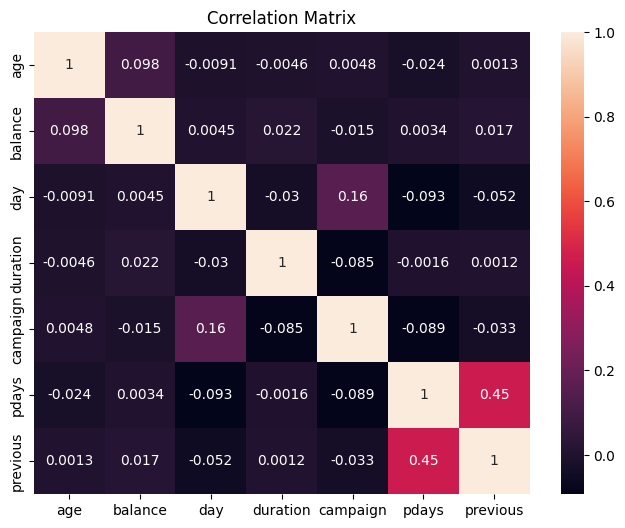

In [5]:
# Question 2: Create the correlation matrix for the numerical features of your dataset. 
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Encode the target variable y
df.y = (df.y == 'yes').astype(int)
df.head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0


In [7]:
# Split df into train/val/test sets with 60%/20%/20% ratio
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Reset the index for all dataframes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

print('Train shape:', df_train.shape)
print('Validation shape:', df_val.shape)
print('Test shape:', df_test.shape)

Train shape: (27126, 15)
Validation shape: (9042, 15)
Test shape: (9043, 15)


In [8]:
# Separate the target variable from the features
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [9]:
del df_train['y']
del df_val['y']
del df_test['y']

In [10]:
# Question 3: Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
categorical = df.select_dtypes(include='object').columns.tolist()

def calculate_mi(series):
    return mutual_info_score(series, y_train)

mi = df_train[categorical].apply(calculate_mi).round(2)
display(mi.sort_values(ascending=False))

poutcome     0.03
month        0.03
job          0.01
contact      0.01
housing      0.01
education    0.00
marital      0.00
dtype: float64

In [11]:
# Question 4: Let's train a logistic regression
numerical = df_train.select_dtypes(include='number').columns.tolist()
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [12]:
train_dicts[0]

{'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'housing': 'yes',
 'contact': 'cellular',
 'month': 'aug',
 'poutcome': 'unknown',
 'age': 32,
 'balance': 1100,
 'day': 11,
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0}

In [13]:
# One-hot encoding for the categorical features in the training set
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(27126, 47)

In [14]:
# # One-hot encoding for the categorical features in the validation set
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(9042, 47)

In [15]:
# Train a logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [16]:
# Weight of the features
model.coef_[0].round(3)

array([-2.000e-03,  0.000e+00, -8.000e-02,  2.640e-01,  7.300e-02,
       -1.274e+00,  7.000e-03,  4.000e-03, -4.280e-01, -2.450e-01,
       -6.200e-02, -2.020e-01, -1.080e-01, -8.290e-01,  6.500e-02,
       -2.260e-01, -2.570e-01, -2.930e-01, -8.600e-02,  3.410e-01,
       -2.960e-01, -1.560e-01,  2.530e-01, -1.590e-01,  1.500e-02,
       -1.370e-01, -2.940e-01, -4.650e-01, -1.780e-01,  5.700e-02,
       -7.100e-01,  3.290e-01, -3.360e-01, -1.017e+00, -9.850e-01,
        3.040e-01,  1.330e+00, -4.840e-01, -9.670e-01,  7.890e-01,
        7.520e-01, -1.000e-03, -7.910e-01, -6.170e-01,  1.496e+00,
       -1.025e+00,  5.000e-03])

In [17]:
# Accuracy of the model on the validation set
y_pred = model.predict(X_val)
accuracy = (y_val == y_pred).mean().round(2)
print('Accuracy:', accuracy)

Accuracy: 0.9


In [18]:
# Question 5: Let's find the least useful feature using the feature elimination technique.
# Train a model with all these features (using the same parameters as in Q4).
base_model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
base_model.fit(X_train, y_train)
accuracy_base = (base_model.predict(X_val) == y_val).mean()
print('Accuracy with all features:', accuracy_base.round(4))

Accuracy with all features: 0.9007


In [19]:
# Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
excluded_features = ['age', 'balance', 'marital', 'previous']
differences = {}

for feature in excluded_features:
    _train = df_train.drop(feature, axis=1)
    _val = df_val.drop(feature, axis=1)
    _numerical = [col for col in numerical if col != feature]
    _categorical = [col for col in categorical if col != feature]
    dv_small = DictVectorizer(sparse=False)
    _train_dicts = _train[_categorical + _numerical].to_dict(orient='records')
    _X_train = dv_small.fit_transform(_train_dicts)
    _val_dicts = _val[_categorical + _numerical].to_dict(orient='records')
    _X_val = dv_small.transform(_val_dicts)
    model_excluded = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_excluded.fit(_X_train, y_train)
    accuracy_excluded = (model_excluded.predict(_X_val) == y_val).mean()
    print(f'Accuracy without {feature}: {accuracy_excluded.round(4)}')
    differences[feature] = accuracy_base - accuracy_excluded

Accuracy without age: 0.9011
Accuracy without balance: 0.901
Accuracy without marital: 0.9012
Accuracy without previous: 0.9011


In [20]:
# For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
# Which feature has the smallest difference?
for feature, difference in differences.items():
    print(f'{feature}: {difference.round(4)}')

age: -0.0004
balance: -0.0003
marital: -0.0006
previous: -0.0004


In [24]:
# Question 6: Now let's train a regularized logistic regression.
# Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].

for C in [0.01, 0.1, 1, 10, 100]:
    model_reg = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model_reg.fit(X_train, y_train)
    accuracy_reg = (model_reg.predict(X_val) == y_val).mean()
    print(f'Accuracy with C={C}: {accuracy_reg.round(3)}')

Accuracy with C=0.01: 0.898
Accuracy with C=0.1: 0.901
Accuracy with C=1: 0.901
Accuracy with C=10: 0.901
Accuracy with C=100: 0.901
